# Microsoft Power BI para Business Intelligence e Data Science

## <font color='blue'>Segmentação de clientes usando Machine Learning com Python + Power BI</font>


#### Problema de Negócio a ser resolvido:

Considerando dados históricos de clientes que realizaram compras em uma empresa, realizar a segmentação (agrupamento) desses clientes por similaridade de características em 3 grupos e fornecer o relatório para a equipe de marketing.

****
**Descrição:**

Etapas feitas nesse jupyter:
* Importação das bibliotecas e carregamento dos dados
* Nesse laboratório haverá uma pequena análise exploratória, mas não há necessidade pois os dados já foram fornecidos limpos pela Data Science Academy.
* Nesse modelo também não testaremos a acurácia do treinamento, em projetos futuros haverá o processo completo.
* Pré processamento dos dados
* Criação do modelo utilizando algoritmo de aprendizado não supervisionado.

Para esse projeto utilizarei as bibliotecas:

* scikit-learn para construir o modelo baseado no algoritmo de clusterização Kmeans.
* Pandas para leitura, análise exploratória e carregamento dos dados.

OBS: Sem dados históricos, não existe a possibilidade de se utilizar ML.
****

In [1]:
# Imports
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Carregando dados

In [4]:
df = pd.read_csv('dados_clientes.csv')

In [3]:
df.head()

,id,idade,renda_anual,pontuacao_gastos
0,1,56,94740,90
1,2,69,136352,50
2,3,46,86617,62
3,4,32,114841,97
4,5,60,36896,51


## Análise exploratória

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                500 non-null    int64
 1   idade             500 non-null    int64
 2   renda_anual       500 non-null    int64
 3   pontuacao_gastos  500 non-null    int64
dtypes: int64(4)
memory usage: 15.8 KB


<AxesSubplot: >

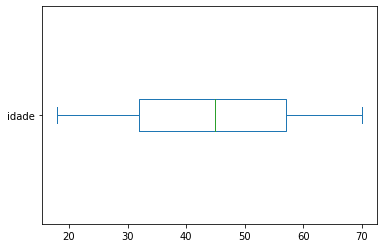

In [10]:
# verificando outlier em idade
df['idade'].plot(kind='box', vert=False)

In [11]:
df.describe()

,id,idade,renda_anual,pontuacao_gastos
count,500.000000,500.000000,500.000000,500.000000
mean,250.500000,44.732000,81557.166000,48.512000
std,144.481833,15.239707,36764.379945,29.556946
min,1.000000,18.000000,20384.000000,0.000000
25%,125.750000,32.000000,49172.750000,24.000000
50%,250.500000,45.000000,79219.000000,48.500000
75%,375.250000,57.000000,113017.250000,73.250000
max,500.000000,70.000000,149695.000000,100.000000


## Pré-processamento dos dados

* O KMeans foi o algoritmo escolhido para essa tarefa pois é amplamente utilizado para clusterização. Cada algoritmo tem seu padrão para receber os dados, e nesse caso precisarei padronizar os dados antes de colocá-los no modelo, pois eles estão em escalas diferentes.

In [12]:
# cria o padronizador dos dados
padronizador = StandardScaler()

In [13]:
# aplica o padronizador nas colunas indicadas
dados_padronizados = padronizador.fit_transform(df[['idade', 'renda_anual', 'pontuacao_gastos']])

In [14]:
# visualizando a padronização
print(dados_padronizados)

[[ 0.74012478  0.35893538  1.40506904]
 [ 1.59401387  1.49192537  0.05039391]
 [ 0.08328703  0.13776654  0.45679645]
 ...
 [-0.31081563  0.32661636  0.18586143]
 [-1.23038848 -1.48706069  1.43893592]
 [-1.03333716 -0.96992912 -0.59307677]]


## Construção do modelo de ML para segmentação de clientes

In [15]:
# definindo a quantidade de clusters
n = 3

In [16]:
# criando o modelo kmeans
kmeans = KMeans(n_clusters = n)

**** 
OBS: A equipe de marketing solicitou 3 grupos, mas será que 3 grupos é o número ideal para classificar? O correto seria realizar trabalho prévio para validar qual o melhor valor para **n**, usando algum algoritmo. Nesse caso vai ser um bom valor porque a DSA garantiu que esse seria o ideal.

****

In [17]:
# Treinando o modelo com os dados padronizados
kmeans.fit(dados_padronizados)

KMeans(n_clusters=3)

In [18]:
df['cluster'] = kmeans.labels_

In [21]:
df['cluster'].value_counts()

cluster
2    176
1    168
0    156
Name: count, dtype: int64

In [26]:
df.sample(5)

,id,idade,renda_anual,pontuacao_gastos,cluster
274,275,37,113714,17,2
375,376,36,55547,71,1
116,117,34,114297,16,2
338,339,58,61430,46,0
437,438,24,24809,28,0


## Salvando o resultado

In [27]:
df.to_csv('segmentos.csv', index=False)

****
**Lembrando:** O correto seria realizar treinar o modelo com dados de teste e depois utilizar os dados desejados para verificar a acurácia do modelo.
***

## Gerando relatório no Power BI

Apartir de agora, é só criar o relatório dos dados criados no Power BI e entregar para o setor de Marketing.

OBS: O arquivo e link do relatório vão estar no repositório.